In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
temp = np.zeros((180,62))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/TEMP150/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0,200:400,700:1000]
        plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        temp[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
temp.shape

(180, 62)

In [5]:
salt = np.zeros((180,62))
i = 0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/SALT/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0,200:400,700:1000]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        salt[i] = aveplot
        
        i = i + 1
#********************************************************************

In [6]:
import gsw

In [7]:
# Calculates Conservative Temperature of seawater from potential temperature
consertmp = gsw.CT_from_pt(salt,temp)

In [8]:
#Calculates potential density anomaly with reference pressure of 0 dbar
densityanomaly = gsw.sigma0(salt,consertmp)

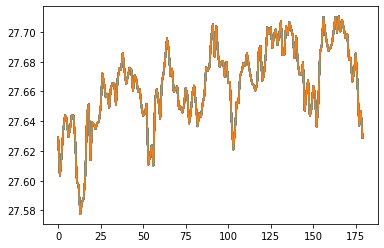

In [9]:
plt.plot(densityanomaly)

In [10]:
np.save(file="0density.npy", arr=densityanomaly)

In [11]:
mid= np.load(file="250density.npy")



In [12]:
mid500= np.load(file="250density500.npy")

In [13]:
mid330 = np.load(file="330density250.npy")

In [14]:
dd = np.vstack((mid, mid330))

In [15]:
ddfinal = np.vstack((dd, mid500))

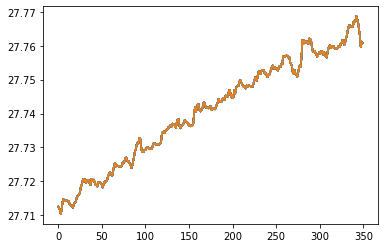

In [16]:
plt.plot(ddfinal)

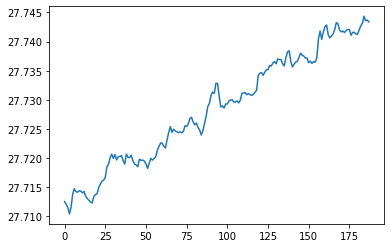

In [17]:
plt.plot(dd[:,0])

In [18]:
sur = np.load(file="0density.npy")

In [19]:
sur500 = np.load(file="250density0.npy")

In [20]:
sur330 = np.load(file="330density0.npy")

In [21]:
ddsur = np.vstack((sur, sur330))
ddsurfinal = np.vstack((ddsur, sur500))


In [22]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


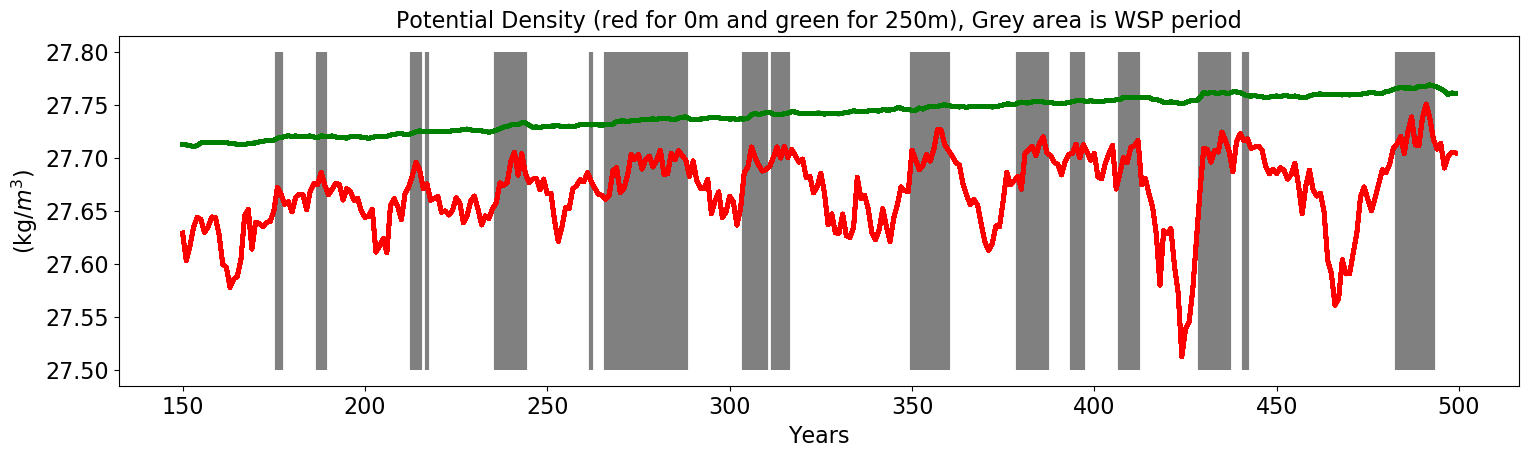

In [23]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])

ax0.plot(ddsurfinal,'r',linewidth=3)
ax0.plot(ddfinal,'g',linewidth=3)
#y = 0.003*t+67
#ax0.plot(t, y, c='orange',linewidth=3)
#ax0.fill_between(t,y,-ww2,where=-ww2<y,facecolor='purple', alpha=1)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,351,50), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(kg/$m^3$)',color= 'k',**my_font)
#ax0.set(ylim=(27.50, 27.8),xlim=(0, 350))
#ax0.invert_yaxis()
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.vlines(wspxx, 27.5, 27.8, colors = "grey",linewidth=3)
#ax0.set(ylim=(0, 0.25),xlim=(0, 350))
#ax2 = ax0.twinx() 
#ax2.plot(t[:346],temm,'blue',linewidth=2)
#plt.yticks(**my_font)
#plt.ylabel('($^\circ$C) 205m',color= 'blue',**my_font)
#plt.axis("tight")
#plt.ylabel('SAM index',color= 'red',**my_font)

ax0.set_title('Potential Density (red for 0m and green for 250m), Grey area is WSP period',**my_font)
plt.savefig("density2.png",bbox_inches='tight',dpi=fig.dpi)

In [24]:
np.savetxt('dens.out', ddsurfinal[:,0])



In [17]:
np.savetxt('den250.out', ddfinal[:,0])

In [70]:
dif = ddsurfinal-ddfinal

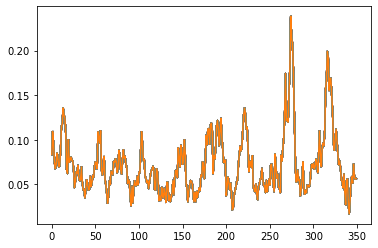

In [71]:
plt.plot(-dif)

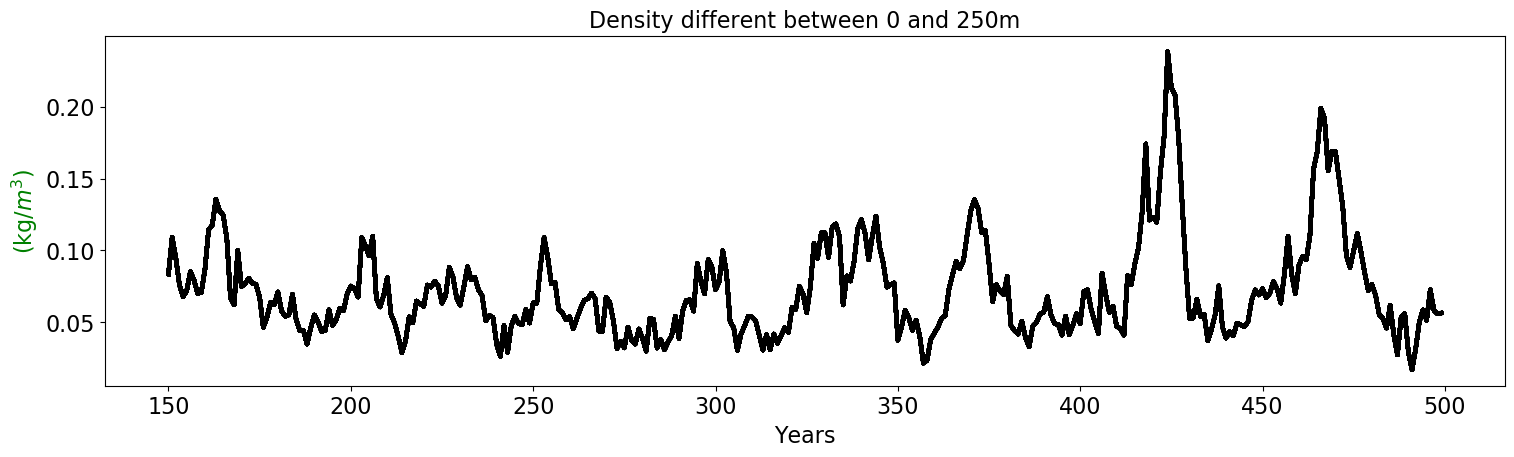

In [85]:
#t = np.arange(0,4141,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])

#plt.vlines(noxx, 0, 0.25, colors = "grey",linewidth=3)
#plt.vlines(mrpxx,0, 0.25, colors = "blue",linewidth=3)

#plt.vlines(wspxx, 0, 0.52, colors = "yellow",linewidth=3)
ax0.plot(-dif,'k',linewidth=3)
#y = 0.003*t+67
#ax0.plot(t, y, c='orange',linewidth=3)
#ax0.fill_between(t,y,-ww2,where=-ww2<y,facecolor='purple', alpha=1)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,351,50), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(kg/$m^3$)',color= 'g',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)

#ax0.set(ylim=(0, 0.25),xlim=(0, 350))
#ax2 = ax0.twinx() 
#ax2.plot(t[:346],temm,'blue',linewidth=2)
#plt.yticks(**my_font)
#plt.ylabel('($^\circ$C) 205m',color= 'blue',**my_font)
#plt.axis("tight")
#plt.ylabel('SAM index',color= 'red',**my_font)

ax0.set_title('Density different between 0 and 250m',**my_font)
plt.savefig("density.png",bbox_inches='tight',dpi=fig.dpi)

In [11]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")